# KNN Medium
Using 10 k fold cross validation; and ***number of neighbors is set to 10 and distence metric as minkowski with power p=2*** for Medium KNN.
As the actual implementation of the Paper is in MATLAB, here the corresponding parameters are put in python code usig the [MATLAB source](https://www.mathworks.com/help/stats/choose-a-classifier.html)

![Photo](KNN.png "MATLAB Source")

# Preprocessing
Getting to know the data set, its ***Exploratory analysis*** and ***Descriptive Statistics** along with **Dealing with Missing values, Encoding of categorical values and mapping class variables*** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing
## Feature Engineering, dealing with Missing values and categorical values

In [2]:
dataset = pd.read_csv("../Intrusion_detection_NSL_KDD.csv")
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [3]:
# lets see the columns names in the dataset
print(len(dataset.columns))
dataset.columns

42


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type'],
      dtype='object')

In [4]:
# lets see the indices as well
dataset.index

RangeIndex(start=0, stop=148514, step=1)

In [5]:
# Checking the frequency of different attacks
dataset['attack_type'].value_counts()

normal             77052
neptune            45870
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


In [6]:
# plt.hist(dataset['attack_type'], bins=20);

In [7]:
# How many types of attacks are there
print(dataset['attack_type'].unique())
len(dataset['attack_type'].unique())
# print(dataset['attack_type'].nunique())

['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl' 'saint' 'mscan' 'apache2' 'snmpgetattack'
 'processtable' 'httptunnel' 'ps' 'snmpguess' 'mailbomb' 'named'
 'sendmail' 'xterm' 'worm' 'xlock' 'xsnoop' 'sqlattack' 'udpstorm']


40

In [8]:
# making the new merged column, as said in the FieldNames.pdf
# There are 40 different attack_types but in the file it just talks about 22
attack_merge_dic = {
    'back':'dos',
    'buffer_overflow':'u2r',
    'ftp_write':'r2l',
    'guess_passwd':'r2l',
    'imap':'r2l',
    'ipsweep':'probe',
    'land':'dos',
    'loadmodule':'u2r',
    'multihop':'r2l',
    'neptune':'dos',
    'nmap':'probe',
    'perl':'u2r',
    'phf':'r2l',
    'pod':'dos',
    'portsweep':'probe',
    'rootkit':'u2r',
    'satan':'probe',
    'smurf':'dos',
    'spy':'r2l',
    'teardrop':'dos',
    'warezclient':'r2l',
    'warezmaster':'r2l',
    'normal':'normal'
}
attack_merge_dic

{'back': 'dos',
 'buffer_overflow': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'multihop': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'rootkit': 'u2r',
 'satan': 'probe',
 'smurf': 'dos',
 'spy': 'r2l',
 'teardrop': 'dos',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'normal': 'normal'}

In [9]:
# mapping the values in the attack_type to the given four types
dataset['target_variable']=dataset['attack_type'].map(attack_merge_dic)

In [10]:
dataset.tail(60)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,target_variable
148454,0,tcp,http,SF,326,921,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,normal
148455,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf,dos
148456,281,tcp,ftp,SF,163,599,0,0,0,2,...,0.07,0.93,0.00,0.00,0.00,0.00,0.93,0.00,warezmaster,r2l
148457,1,tcp,smtp,SF,2599,293,0,0,0,0,...,0.72,0.13,0.00,0.00,0.00,0.00,0.27,0.00,mailbomb,NaN
148458,0,tcp,other,REJ,0,0,0,0,0,0,...,0.07,0.02,0.00,0.00,0.00,0.00,0.08,0.95,httptunnel,NaN
148459,0,tcp,http,SF,318,3928,0,0,0,0,...,1.00,0.00,0.17,0.04,0.00,0.00,0.00,0.00,normal,normal
148460,0,tcp,pop_3,SF,30,217,0,0,0,0,...,0.04,0.03,0.00,0.00,0.01,0.00,0.00,0.00,guess_passwd,r2l
148461,0,udp,private,SF,105,146,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,normal
148462,0,tcp,http,SF,246,332,0,0,0,0,...,1.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,normal,normal
148463,0,udp,other,SF,1,1,0,0,0,0,...,0.00,0.72,1.00,0.00,0.00,0.00,0.00,0.00,satan,probe


In [11]:
# As out of 40 attack_types we can provide 4 names for the 22 types, remaining 28 will have NaN 
dataset['target_variable'].value_counts()

normal    77052
dos       51667
probe     12762
r2l        3194
u2r          89
Name: target_variable, dtype: int64

In [12]:
sum(dataset['target_variable'].isnull())

3750

In [13]:
# removing the rows which have NaN values for the attack type
dataset.dropna(axis=0, how='any', inplace=True)

In [14]:
sum(dataset['target_variable'].isnull())

0

In [15]:
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,target_variable
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,dos
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,dos


In [16]:
# Checking for categorical variables 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144764 entries, 0 to 148512
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     144764 non-null  int64  
 1   protocol_type                144764 non-null  object 
 2   service                      144764 non-null  object 
 3   flag                         144764 non-null  object 
 4   src_bytes                    144764 non-null  int64  
 5   dst_bytes                    144764 non-null  int64  
 6   land                         144764 non-null  int64  
 7   wrong_fragment               144764 non-null  int64  
 8   urgent                       144764 non-null  int64  
 9   hot                          144764 non-null  int64  
 10  num_failed_logins            144764 non-null  int64  
 11  logged_in                    144764 non-null  int64  
 12  num_compromised              144764 non-null  int64  
 13 

In [17]:
X = dataset.iloc[:,:-2].values # excluding the duration column, and the attack_type column

y = dataset.iloc[:,-1].values # attack type is the last column and our target variable

In [18]:
X

array([[0, 'udp', 'other', ..., 0.0, 0.0, 0.0],
       [0, 'tcp', 'private', ..., 1.0, 0.0, 0.0],
       [0, 'tcp', 'http', ..., 0.01, 0.0, 0.01],
       ...,
       [0, 'tcp', 'http', ..., 0.0, 0.0, 0.0],
       [0, 'tcp', 'http', ..., 0.0, 0.07, 0.07],
       [0, 'udp', 'domain_u', ..., 0.0, 0.0, 0.0]], dtype=object)

In [19]:
y

array(['normal', 'dos', 'normal', ..., 'normal', 'dos', 'normal'],
      dtype=object)

In [20]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, ..., 0.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, ..., 0.01, 0.0, 0.01],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, ..., 0.0, 0.07, 0.07],
       [0.0, 0.0, 1.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [21]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 0, 1, ..., 1, 0, 1])

In [22]:
# # Taking care of missing values if any in the independent variables
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X[:, :])
# X[:, :] = imputer.transform(X[:,:])

In [23]:
# Spliting the dataset into the training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size=0.3)

print(f"Lenght of x_test {len(X_test)}\nlenght of y_test {len(y_test)}")
print(f"Lenght of x_train {len(X_train)}\nlenght of y_train {len(y_train)}")

Lenght of x_test 43430
lenght of y_test 43430
Lenght of x_train 101334
lenght of y_train 101334


In [24]:
# feature scaling - Min-Max Normailization 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [25]:
# sc= StandardScaler()
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test=minmax.transform(X_test)

In [26]:
X_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [27]:
X_train

array([[0.  , 1.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.09, 0.29],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ]])

# Medium KNN 
with number of neighbors = 10


In [28]:
# Training the Knn model on the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10, p=2, metric = 'minkowski')
classifier.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [29]:
# Predicting the test results
p_test = classifier.predict(X_test)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f095ad54a60>
Traceback (most recent call last):
  File "/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [30]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,p_test)
print(cm)

print(accuracy_score(p_test,y_test))


[[15664    27     6     0     0]
 [   66 22854    42    38     2]
 [   45    53  3630     0     0]
 [    1   125     0   850     0]
 [    0    14     0     4     9]]
0.9902601888095787


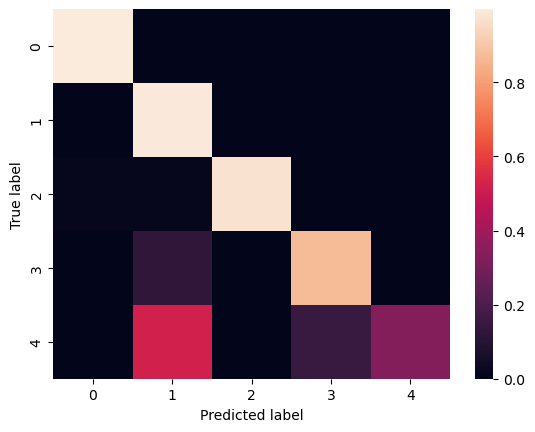

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y_test, p_test)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [32]:
# Classification report

target_names = le.classes_
# labels = le.classes_
print(classification_report(y_test, p_test, zero_division=0, target_names=target_names)) #, target_names=target_names

              precision    recall  f1-score   support

         dos       0.99      1.00      1.00     15697
      normal       0.99      0.99      0.99     23002
       probe       0.99      0.97      0.98      3728
         r2l       0.95      0.87      0.91       976
         u2r       0.82      0.33      0.47        27

    accuracy                           0.99     43430
   macro avg       0.95      0.83      0.87     43430
weighted avg       0.99      0.99      0.99     43430



In [33]:
print(accuracy_score(p_test,y_test))

0.9902601888095787


In [34]:
# Saving the model for future use
import pickle

pkl_file_nameKNN="model_knn_medium.pkl"
with open(pkl_file_nameKNN,'wb') as fileKNN:
    pickle.dump(classifier, fileKNN)

In [35]:
# Applying k fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train,y_train,cv=10)
print(scores)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f09873b2700>
Traceback (most recent call last):
  File "/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_p

[0.99013223 0.98963884 0.98825735 0.99013223 0.99003257 0.98796013
 0.98953913 0.98746669 0.99003257 0.99022994]


In [38]:
print(f"Best Accuracy : {scores[scores.argmax()]}")
print(f"Mean Accuracy : {scores.mean()}")
print(f"Standard Deviation: {scores.std()}")

Best Accuracy : 0.9902299417744005
Mean Accuracy : 0.9893421675649133
Standard Deviation: 0.000985946401741795


In [37]:
stop

NameError: name 'stop' is not defined

In [ ]:
# # Applying grid search to find the best model and the best parameters
# from sklearn.model_selection import GridSearchCV
# parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
#               {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 5000,
#                            n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)